In [91]:
#IMPOR
import spacy
from spacy import displacy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import defaultdict
from textblob import TextBlob
from nltk.probability import FreqDist


In [92]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

In [93]:
text = """
Dr. John Anderson, a cardiologist, will be attending the medical conference in New York on June 15, 2023.
The conference will take place at the Hilton Hotel, located at 123 Broadway.
Sarah Roberts, a renowned neurologist, will also be a speaker at the event.
On June 10, 2023, the pharmaceutical company ABC Inc. will announce a breakthrough drug at the conference.
Dr. Emily White, an oncologist, is flying in from Los Angeles to attend the event.
"""

#Another sample text you can try, or you can insert your own text

#John Smith, an employee of XYZ Corporation, lives on Elm Street. Jane Doe's office is on Oak Avenue. 
#The park is located at 123 Maple Boulevard. Mary Johnson works at 456 Pine Street.
#Michael Davis and Sarah Roberts were spotted near the Riverside Cafe on River Road.
#Alice Park, a member of the XYZ Corporation team, resides at 789 Oak Avenue. The Johnson family's house is on Sunset Boulevard.
#Their meeting is scheduled for June 10, 2023. The conference will be held at the Marriott Hotel on Main Street.


#IMPORTANT: ALL SAMPLE TEXTS ARE GENERATED BY CHATGPT.

#preview text
print(text)


Dr. John Anderson, a cardiologist, will be attending the medical conference in New York on June 15, 2023.
The conference will take place at the Hilton Hotel, located at 123 Broadway.
Sarah Roberts, a renowned neurologist, will also be a speaker at the event.
On June 10, 2023, the pharmaceutical company ABC Inc. will announce a breakthrough drug at the conference.
Dr. Emily White, an oncologist, is flying in from Los Angeles to attend the event.



In [95]:
# Create a TextBlob object with the text
blob = TextBlob(text)

# Translate the text to Spanish
translated_blob = blob.translate('en', 'ja')

# Print the translated text
print(translated_blob)

心臓専門医のジョン・アンダーソン博士は、2023年6月15日にニューヨークで開催された医療会議に出席します。
会議は、123ブロードウェイにあるヒルトンホテルで開催されます。
有名な神経科医であるサラ・ロバーツも、このイベントの講演者になります。
2023年6月10日、Pharmaceutical Company ABC Inc.は、会議で画期的な薬を発表します。
腫瘍医であるエミリー・ホワイト博士は、イベントに参加するためにロサンゼルスから飛んでいます。


In [96]:
words = word_tokenize(text)

In [97]:
nltk.pos_tag(words)

[('Dr.', 'NNP'),
 ('John', 'NNP'),
 ('Anderson', 'NNP'),
 (',', ','),
 ('a', 'DT'),
 ('cardiologist', 'NN'),
 (',', ','),
 ('will', 'MD'),
 ('be', 'VB'),
 ('attending', 'VBG'),
 ('the', 'DT'),
 ('medical', 'JJ'),
 ('conference', 'NN'),
 ('in', 'IN'),
 ('New', 'NNP'),
 ('York', 'NNP'),
 ('on', 'IN'),
 ('June', 'NNP'),
 ('15', 'CD'),
 (',', ','),
 ('2023', 'CD'),
 ('.', '.'),
 ('The', 'DT'),
 ('conference', 'NN'),
 ('will', 'MD'),
 ('take', 'VB'),
 ('place', 'NN'),
 ('at', 'IN'),
 ('the', 'DT'),
 ('Hilton', 'NNP'),
 ('Hotel', 'NNP'),
 (',', ','),
 ('located', 'VBN'),
 ('at', 'IN'),
 ('123', 'CD'),
 ('Broadway', 'NNP'),
 ('.', '.'),
 ('Sarah', 'NNP'),
 ('Roberts', 'NNP'),
 (',', ','),
 ('a', 'DT'),
 ('renowned', 'JJ'),
 ('neurologist', 'NN'),
 (',', ','),
 ('will', 'MD'),
 ('also', 'RB'),
 ('be', 'VB'),
 ('a', 'DT'),
 ('speaker', 'NN'),
 ('at', 'IN'),
 ('the', 'DT'),
 ('event', 'NN'),
 ('.', '.'),
 ('On', 'IN'),
 ('June', 'NNP'),
 ('10', 'CD'),
 (',', ','),
 ('2023', 'CD'),
 (',', ','),
 

In [98]:
print (len(words))

91


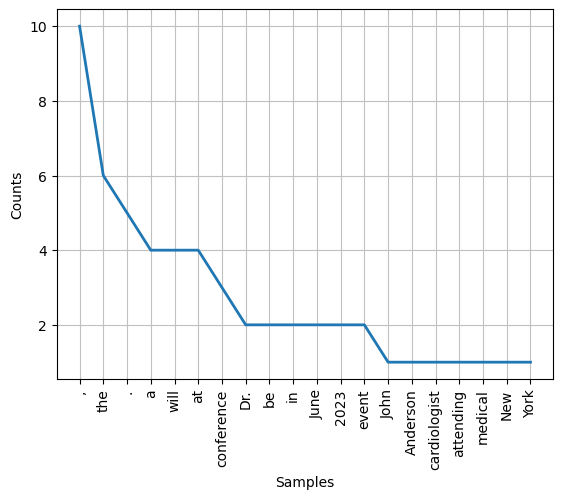

<Axes: xlabel='Samples', ylabel='Counts'>

In [102]:

fdist = FreqDist(words)

fdist.most_common(20)

import matplotlib.pyplot as plt
%matplotlib inline
fdist.plot(20)

In [57]:
# Process the text with spaCy
doc = nlp(text)


In [58]:
# Define formatting for different named entities
name_format = '<b>{}</b>'
location_format = '<mark>{}</mark>'
date_format = '<u>{}</u>'
org_format = '<i>{}</i>'


In [61]:
# Initialize lists to store formatted tokens
formatted_tokens = []

# Create dictionaries to store data
data_dict = defaultdict(list)

In [62]:
# Process named entities
for token in doc:
    if token.ent_type_ == 'PERSON':
        # Format names
        formatted_tokens.append(name_format.format(token.text))
        data_dict['Name'].append(token.text)
    elif token.ent_type_ == 'GPE':
        # Highlight locations
        formatted_tokens.append(location_format.format(token.text))
        data_dict['Location'].append(token.text)
    elif token.ent_type_ == 'DATE':
        # Underline dates
        formatted_tokens.append(date_format.format(token.text))
        data_dict['Date'].append(token.text)
    elif token.ent_type_ == 'ORG':
        # Italicize organizations
        formatted_tokens.append(org_format.format(token.text))
        data_dict['Organization'].append(token.text)
    else:
        formatted_tokens.append(token.text)

In [67]:
# Ensure all categories have the same length by adding 'None' for missing data
max_length = max(len(data_dict['Name']), len(data_dict['Location']), len(data_dict['Date']), len(data_dict['Organization']))
for key in data_dict.keys():
    data_dict[key] += [None] * (max_length - len(data_dict[key]))

In [68]:
# Combine the formatted tokens back into a string
formatted_text = ' '.join(formatted_tokens)

# Print the formatted text
print(formatted_text)



 Dr. <b>John</b> <b>Anderson</b> , a cardiologist , will be attending the medical conference in <mark>New</mark> <mark>York</mark> on <u>June</u> <u>15</u> <u>,</u> <u>2023</u> . 
 The conference will take place at the Hilton Hotel , located at 123 Broadway . 
 <b>Sarah</b> <b>Roberts</b> , a renowned neurologist , will also be a speaker at the event . 
 On <u>June</u> <u>10</u> <u>,</u> <u>2023</u> , the pharmaceutical company <i>ABC</i> <i>Inc.</i> will announce a breakthrough drug at the conference . 
 Dr. <b>Emily</b> <b>White</b> , an oncologist , is flying in from <mark>Los</mark> <mark>Angeles</mark> to attend the event . 



In [69]:
# Display the formatted text with named entities highlighted
displacy.render(doc, style='ent', jupyter=True, options={'colors': {'PERSON': 'linear-gradient(90deg, #aa9cfc, #fc9ce7)', 'GPE': 'yellow', 'DATE': 'lightblue', 'ORG': 'lightgreen'}})

In [70]:
# Create a flexible DataFrame
df = pd.DataFrame(data_dict)


In [71]:
# Display data information
print("Data Information:")
print(df.head())
print(df.info())
print(df.describe())

Data Information:
       Name Location  Date Organization
0      John      New  June          ABC
1  Anderson     York    15         Inc.
2     Sarah      Los     ,         None
3   Roberts  Angeles  2023         None
4     Emily     None  June         None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Name          6 non-null      object
 1   Location      4 non-null      object
 2   Date          8 non-null      object
 3   Organization  2 non-null      object
dtypes: object(4)
memory usage: 388.0+ bytes
None
        Name Location  Date Organization
count      6        4     8            2
unique     6        4     5            2
top     John      New  June          ABC
freq       1        1     2            1


In [73]:
# Replace 'None' values with empty strings
df = df.fillna('')

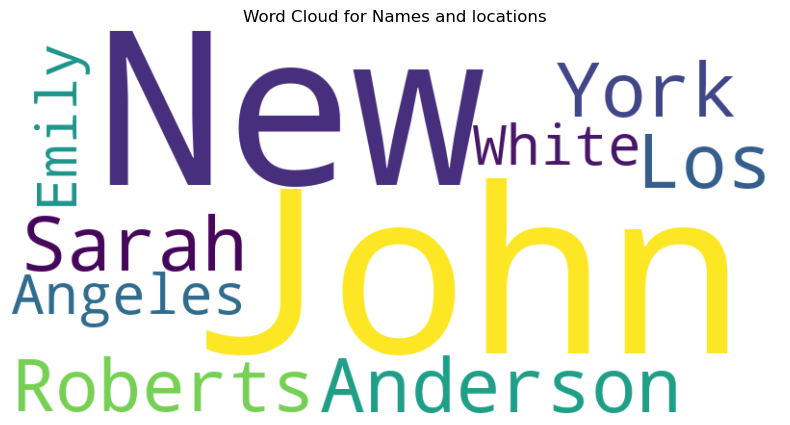

In [74]:


# Create a word cloud for names, locations, and organizations
all_text = ' '.join([name + " " + location for name, location, date, org in zip(df['Name'], df['Location'], df['Date'], df['Organization'])])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_text)

# Display the word cloud using Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud for Names and locations")
plt.show()

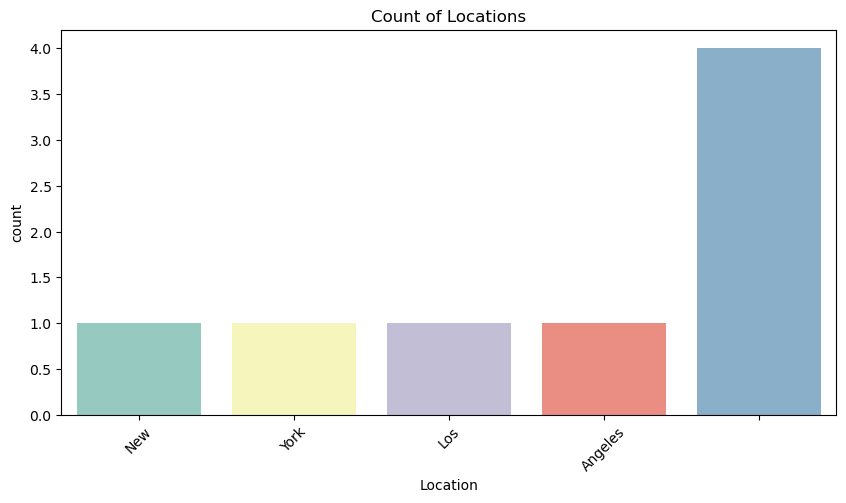

In [75]:
# Create a count plot for locations
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Location', palette="Set3")
plt.title("Count of Locations")
plt.xticks(rotation=45)
plt.show()